In [53]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [55]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


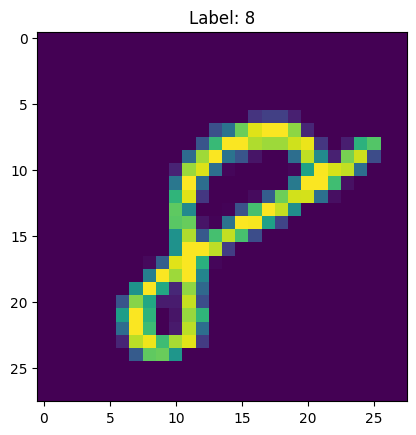

In [56]:
index_to_check = 59999

# Get the image and label at the specified index
image = x_train[index_to_check]
label = y_train[index_to_check]

# Plot the image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()


# **Preprocessing**

In [57]:
x_train_flattened = x_train.reshape(60000, 28 * 28)
x_test_flattened = x_test.reshape(10000, 28 * 28)

In [58]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


# **Building the model**

In [59]:
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(28 * 28,), activation='relu'), # Input Layer
    keras.layers.Dense(100, activation='sigmoid'),                      # Hidden Layer
    keras.layers.Dense(10, activation='sigmoid')                        # Output Layer
])

In [60]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

# **Training the model**


In [73]:
model.fit(x_train_flattened, y_train, batch_size = 500, epochs = 10)

Epoch 1/10
120/120 [==============================] - 4s 29ms/step - loss: 0.0817 - accuracy: 0.9759
Epoch 2/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0732 - accuracy: 0.9782
Epoch 3/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0685 - accuracy: 0.9796
Epoch 4/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0655 - accuracy: 0.9803
Epoch 5/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0609 - accuracy: 0.9820
Epoch 6/10
120/120 [==============================] - 4s 32ms/step - loss: 0.0609 - accuracy: 0.9815
Epoch 7/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0556 - accuracy: 0.9829
Epoch 8/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0548 - accuracy: 0.9840
Epoch 9/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0550 - accuracy: 0.9837
Epoch 10/10
120/120 [==============================] - 2s 20ms/step - loss: 0.0520 - accura

# **Testing the model**

In [76]:
model.evaluate(x_train_flattened, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0436 - accuracy: 0.9867


[0.04363032057881355, 0.9867166876792908]

In [77]:
index = 6
scoreArray = model.predict(x_test_flattened)
print(scoreArray[index])

print(np.argmax(scoreArray[index]))   # predicted number
print(y_test[index])                  # actual number

313/313 [==============================] - 1s 2ms/step
[0.00654826 0.09468266 0.01955429 0.00739305 0.9990253  0.05242429
 0.04139514 0.11062124 0.5397369  0.33481386]
4
4


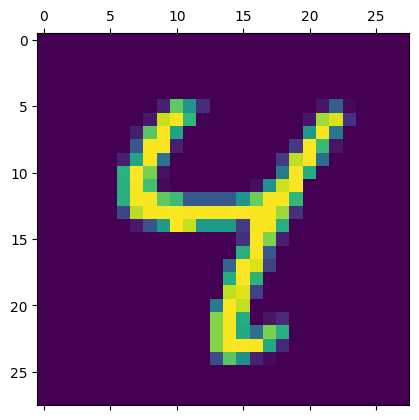

In [78]:
plt.matshow(x_test[index])

# **Uploading custom Image**

In [79]:
import os
import cv2

In [80]:
# os.mkdir("./test_data")

In [93]:
# Resizing the uploaded image
def resize_image(image):
  image = np.array(image)
  image = cv2.resize(image, (28, 28))
  image = cv2.bitwise_not(image)     # invert colors

  return image

In [92]:
image = cv2.imread("./test_data/three.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_image = resize_image(image)

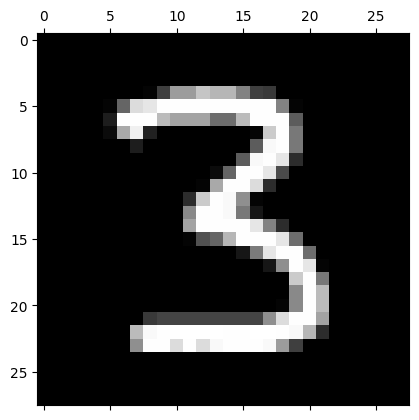

In [83]:
plt.matshow(resized_image, cmap = plt.cm.binary)

In [84]:
image.shape

(225, 224)

In [85]:
def predict(image):
  image = image.reshape(1, 28*28)
  scoreArray = model.predict(image)
  prediction = np.argmax(scoreArray[0])

  return prediction

In [86]:
print(predict(resized_image))   # check prediction

1/1 [==============================] - 0s 36ms/step
6


# **Saving the model**

In [87]:
# os.mkdir("./saved_models")

In [88]:
model.save("./saved_models")

In [89]:
!zip -r ./saved_models.zip ./saved_models

  adding: saved_models/ (stored 0%)
  adding: saved_models/fingerprint.pb (stored 0%)
  adding: saved_models/keras_metadata.pb (deflated 86%)
  adding: saved_models/assets/ (stored 0%)
  adding: saved_models/variables/ (stored 0%)
  adding: saved_models/variables/variables.index (deflated 59%)
  adding: saved_models/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: saved_models/saved_model.pb (deflated 86%)
